[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-01.ipynb)


* 강좌 보기 : https://www.boostcourse.org/ds214/

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Pima.jpg" width=200>

* [Pima people - Wikipedia](https://en.wikipedia.org/wiki/Pima_people)

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [1]:
!if [ $(pip3 list | grep "pandas" | awk '{ print $2 }' | awk 'NR < 2') != 3.8.2 ]; then pip3 install pandas; fi
!if [ $(pip3 list | grep "numpy" | awk '{ print $2 }' | awk 'NR < 2') != 3.8.2 ]; then pip3 install numpy; fi
!if [ $(pip3 list | grep "seaborn" | awk '{ print $2 }' | awk 'NR < 2') != 0.13.1 ]; then pip3 install seaborn==0.13.1; fi
!if [ $(pip3 list | grep "matplotlib" | awk '{ print $2 }' | awk 'NR < 2') != 3.8.2 ]; then pip3 install matplotlib==3.8.2; fi
!if [ $(pip3 list | grep "scikit-learn" | awk '{ print $2 }' | awk 'NR < 2') != 3.8.2 ]; then pip3 install scikit-learn; fi


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tools.kyoulee_tools import *

/var/folders/k8/8d1w64x142jb_cw3gswr6ybm0000gr/T/ipykernel_51891/409308887.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 데이터셋 로드

In [3]:
df = pd.read_csv("data/diabetes_feature.csv")
df.shape

(768, 16)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,102.5,4.639572,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,169.5,5.138735,False
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,102.5,4.639572,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 학습, 예측 데이터셋 나누기

In [5]:
X ,y= df[['Pregnancies', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']], df['Outcome']
X.shape

(768, 9)

In [6]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y ,test_size=0.2)
X_train.head(5)

,Pregnancies,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
429,1,82,25,35.0,0.233,43,False,180.0,False
222,7,0,0,25.2,0.209,37,True,169.5,False
517,7,86,0,37.6,0.304,51,True,169.5,False
295,6,62,31,35.5,0.692,28,False,120.0,False
215,12,70,40,41.8,0.742,38,True,271.0,False


## 정답값이자 예측해야 될 값

In [7]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = 'Outcome'
label_name

'Outcome'

## 머신러닝 알고리즘 가져오기

In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42, max_depth=5)
model

DecisionTreeClassifier(max_depth=5, random_state=42)

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [9]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

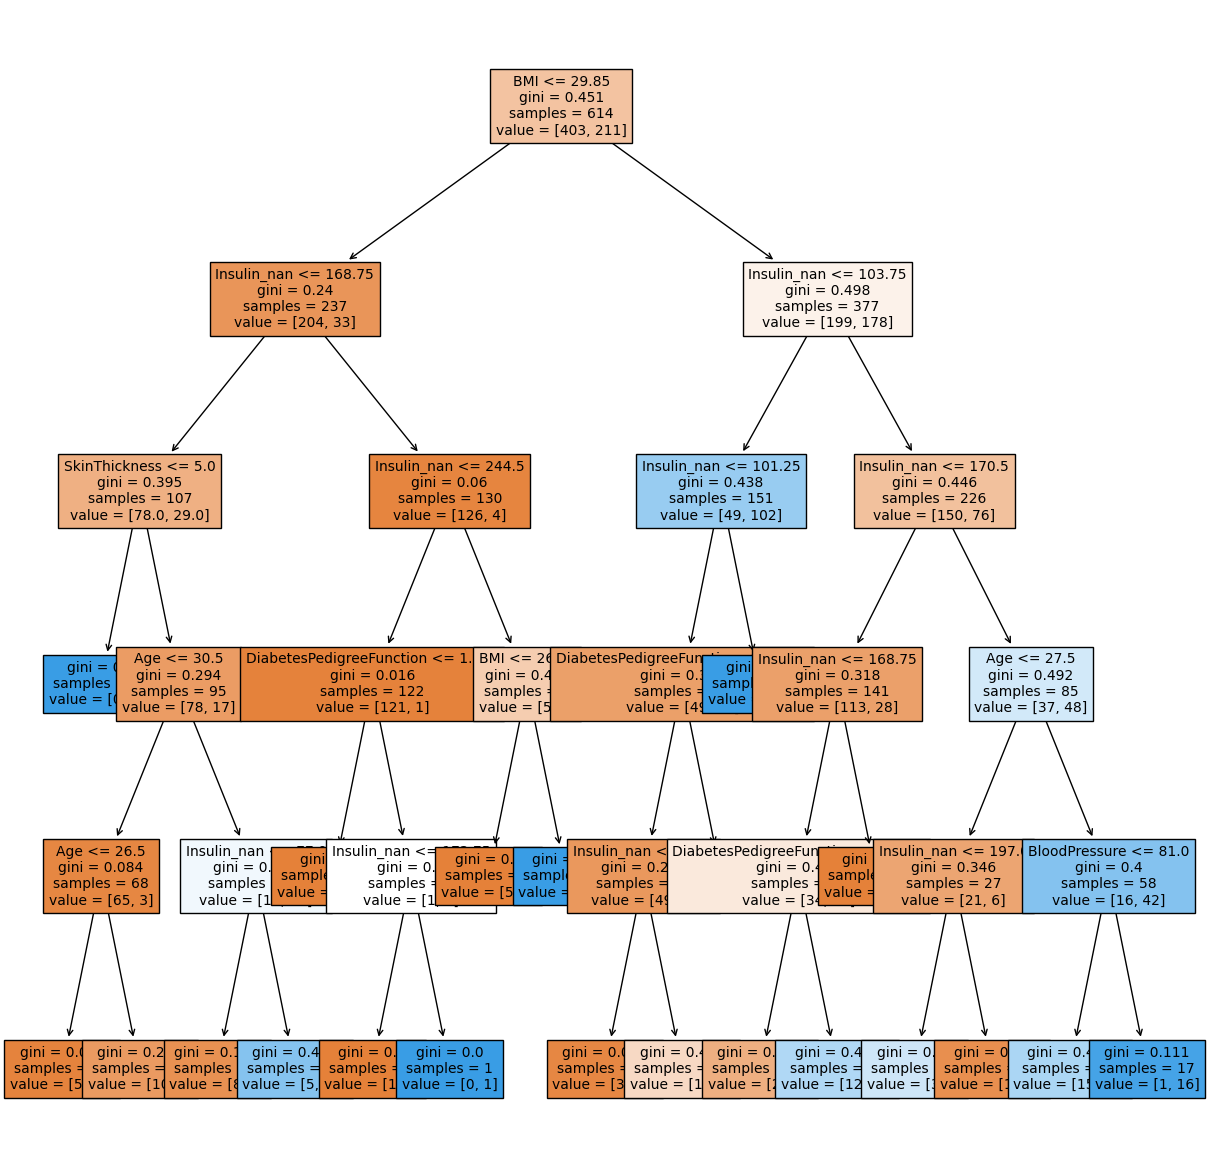

In [10]:
from sklearn.tree import plot_tree

feature_names = X_train.columns.to_list()
plt.figure(figsize=(15,15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

## 최적의 모델 찾기

DecisionTreeClassifier 모델 반복 학습으로 최종 모델 선정

In [11]:
from sklearn.metrics import accuracy_score

train_count = 5
train_deep = 12
deep_best_model = [[None, 0]] * train_deep
deepcheck = [0] * train_deep
for check in range(0,5):
    good_model = None
    best_score = 0
    for max_depth in range(1, train_deep):
        model = DecisionTreeClassifier(max_depth=max_depth)
        score = [0] * train_count
        good_score = 0
        for index in range(0, train_count):
            y_predict = model.fit(X_train, y_train).predict(X_test)
            score[index] = accuracy_score(y_test, y_predict)
            if max(score) == score[index]:
                good_model, good_score = model, score[index]
        if best_score < sum(score) / train_count:
            best_score = sum(score) / train_count
            if (deep_best_model[max_depth][1] < good_score):
                print("New best_model deep[", max_depth, "]: ", deep_best_model[max_depth][1], " -> ", good_score, sep="")
                deep_best_model[max_depth] = [good_model, good_score]
            deepcheck[max_depth] += 1
        # print(max_depth, " : ", sum(score) / train_count)  
print(deepcheck)
select_model = None
for index, value in enumerate(deepcheck):
    if (deepcheck[index] > (train_count * 0.625)):
        select_model = deep_best_model[index][0]
        print("changed model index : ", index, sep="")
select_model

New best_model deep[1]: 0 -> 0.6298701298701299
New best_model deep[2]: 0 -> 0.6623376623376623
New best_model deep[3]: 0 -> 0.8506493506493507
[0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0]
changed model index : 1
changed model index : 2
changed model index : 3


DecisionTreeClassifier(max_depth=3)

## GridSearchCV

In [12]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()
param_grid = {"max_depth": range(3, 12), "max_features": [0.3, 0.5, 0.7, 0.9, 1]}

clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1)
y_result = clf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_result)
clf.best_params_

Fitting 5 folds for each of 45 candidates, totalling 225 fits


{'max_depth': 5, 'max_features': 0.7}

In [13]:
pd.DataFrame(clf.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003167,0.001931,0.002690,0.002150,3,0.3,"{'max_depth': 3, 'max_features': 0.3}",0.780488,0.691057,0.731707,0.707317,0.639344,0.709983,0.046472,40
1,0.002348,0.000907,0.001370,0.000378,3,0.5,"{'max_depth': 3, 'max_features': 0.5}",0.756098,0.764228,0.861789,0.821138,0.729508,0.786552,0.048035,24
2,0.003935,0.002517,0.002581,0.001930,3,0.7,"{'max_depth': 3, 'max_features': 0.7}",0.853659,0.788618,0.739837,0.756098,0.803279,0.788298,0.039703,23
3,0.002268,0.001307,0.000899,0.000053,3,0.9,"{'max_depth': 3, 'max_features': 0.9}",0.869919,0.837398,0.845528,0.715447,0.811475,0.815954,0.053607,14
4,0.001915,0.001086,0.000830,0.000048,3,1,"{'max_depth': 3, 'max_features': 1}",0.756098,0.747967,0.707317,0.691057,0.598361,0.700160,0.056412,42


# RandomizedSearchCV

In [14]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth": range(3, 20), "max_features": [0.3, 0.5, 0.7, 0.9, 1]}

clf = RandomizedSearchCV(
    model,
    param_distributions,
    n_iter=10,
    scoring="accuracy",
    n_jobs=-1,
    cv=5
    )
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': [0.3, 0.5, 0.7, 0.9,
                                                         1]},
                   scoring='accuracy')

In [15]:
clf.best_score_, clf.best_params_

(0.8273757163801146, {'max_features': 0.9, 'max_depth': 16})

In [16]:
max_depth = np.random.randint(1, 20, 10)
max_features = np.random.uniform(0.625, 0.9, 100)

param_distributions_random = {
    "max_depth": max_depth,
    "max_features" : max_features,
    "min_samples_split": list(range(2, 7))
}

param_distributions = {"max_depth": range(3, 20), "max_features": [0.3, 0.5, 0.7, 0.9, 1]}

clf = RandomizedSearchCV(
    model,
    param_distributions_random,
    n_iter=100,
    scoring="accuracy",
    n_jobs=-1,
    cv=5
    )
clf.fit(X_train, y_train)
clf.best_params_ , clf.best_score_


({'min_samples_split': 4, 'max_features': 0.8231472847326307, 'max_depth': 19},
 0.8355057976809276)

In [17]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
30,0.004513,0.006175,0.000725,0.000023,4,0.823147,19,"{'min_samples_split': 4, 'max_features': 0.823...",0.878049,0.829268,0.821138,0.813008,0.836066,0.835506,0.022635,1
9,0.002652,0.001742,0.003225,0.002862,3,0.841968,19,"{'min_samples_split': 3, 'max_features': 0.841...",0.853659,0.796748,0.837398,0.813008,0.860656,0.832294,0.024176,2
94,0.002354,0.001256,0.001042,0.000558,2,0.885211,15,"{'min_samples_split': 2, 'max_features': 0.885...",0.821138,0.813008,0.821138,0.845528,0.852459,0.830654,0.015422,3
97,0.002059,0.000904,0.001023,0.000298,2,0.841968,15,"{'min_samples_split': 2, 'max_features': 0.841...",0.886179,0.796748,0.813008,0.772358,0.877049,0.829068,0.044905,4
96,0.002980,0.001204,0.002146,0.001282,4,0.760954,19,"{'min_samples_split': 4, 'max_features': 0.760...",0.886179,0.772358,0.837398,0.780488,0.868852,0.829055,0.045804,5


In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8701298701298701

<Axes: >

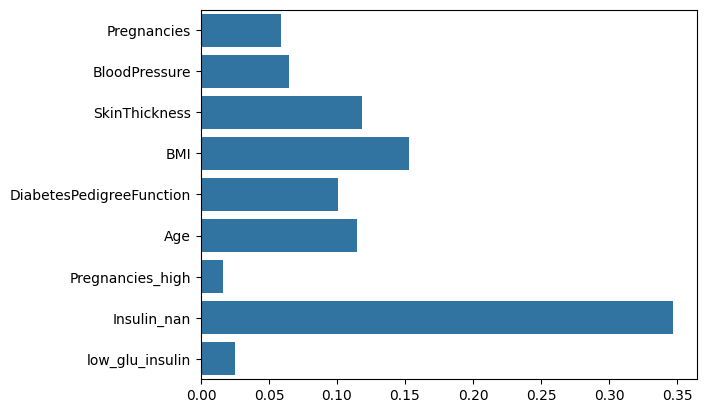

In [19]:
feature_names = X_train.columns.to_list()
sns.barplot(x=model.feature_importances_, y=feature_names)

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [20]:

y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0])

## 정확도(Accuracy) 측정하기

In [21]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됩니다.
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.

diff_count = abs(y_test - y_predict).sum()
diff_count

20

In [22]:
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.

(len(y_test) - diff_count) / len(y_test) * 100

87.01298701298701

In [23]:
feature_names = X_train.columns.tolist()